# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [7]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [8]:
import pandas as pd

In [9]:
data=pd.read_csv("F:\Essential Files\Coding Projects\Machine Learning Class 1/Iris_Data.csv")

In [10]:
data.shape

(150, 5)

In [11]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [13]:
data['species'].str.replace('Iris-', '')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [14]:
data['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [15]:
def describe_new(df):
    df1 = data.sepal_length.describe()
    df1.loc["range"] = df1.loc['max'] - df1.loc['min']
    return df1
print(describe_new(data))

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
range      3.600000
Name: sepal_length, dtype: float64


In [16]:
def describe_new(df):
    df1 = data.sepal_width.describe()
    df1.loc["range"] = df1.loc['max'] - df1.loc['min']
    return df1
print(describe_new(data))

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
range      2.400000
Name: sepal_width, dtype: float64


In [17]:
def describe_new(df):
    df1 = data.petal_length.describe()
    df1.loc["range"] = df1.loc['max'] - df1.loc['min']
    return df1
print(describe_new(data))

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
range      5.900000
Name: petal_length, dtype: float64


In [18]:
def describe_new(df):
    df1 = data.petal_width.describe()
    df1.loc["range"] = df1.loc['max'] - df1.loc['min']
    return df1
print(describe_new(data))

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
range      2.400000
Name: petal_width, dtype: float64


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [19]:
data.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [20]:
data.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [21]:
import numpy as np
data.groupby(['species']).agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

Text(0, 0.5, 'Sepal Width')

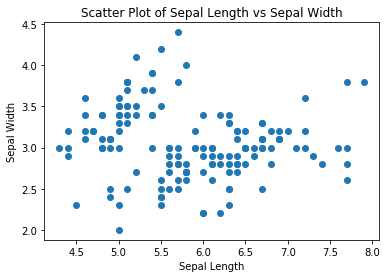

In [22]:
import matplotlib.pyplot as plt
plt.plot(data.sepal_length, data.sepal_width, ls='', marker='o', label='sepal')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

Text(0, 0.5, 'Frequency')

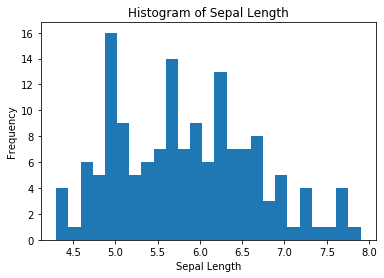

In [23]:
plt.hist(data.sepal_length, bins=25)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

Text(0.5, 1.0, 'Overlayed Histogram of Sepal Length/Width and Petal Length/Width')

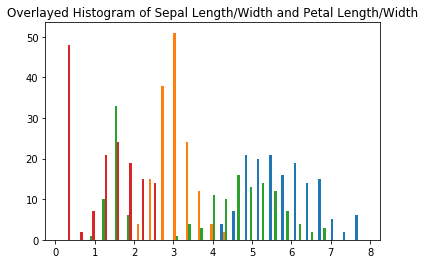

In [24]:
plt.hist([data.sepal_length, data.sepal_width, data.petal_length, data.petal_width], bins=25)
plt.title('Overlayed Histogram of Sepal Length/Width and Petal Length/Width')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

{'whiskers': [<matplotlib.lines.Line2D at 0x1462372a748>,
 'caps': [<matplotlib.lines.Line2D at 0x1462372ae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1462372a358>,
 'medians': [<matplotlib.lines.Line2D at 0x14623734518>,
 'fliers': [<matplotlib.lines.Line2D at 0x14623734860>,
 'means': []}

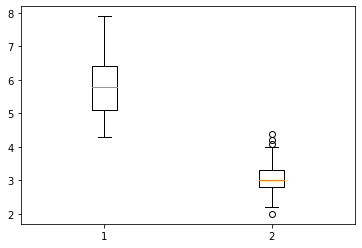

In [25]:
plt.boxplot([data.sepal_length, data.sepal_width])

{'whiskers': [<matplotlib.lines.Line2D at 0x1462379af28>,
 'caps': [<matplotlib.lines.Line2D at 0x146237a8908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1462379add8>,
 'medians': [<matplotlib.lines.Line2D at 0x146237a8f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x146237a8eb8>,
 'means': []}

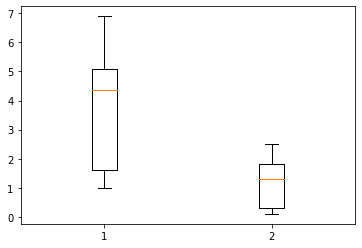

In [26]:
plt.boxplot([data.petal_length, data.petal_width])

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [27]:
 import seaborn as sns
data.stack()

0    sepal_length               5.1
     sepal_width                3.5
     petal_length               1.4
     petal_width                0.2
     species            Iris-setosa
1    sepal_length               4.9
     sepal_width                  3
     petal_length               1.4
     petal_width                0.2
     species            Iris-setosa
2    sepal_length               4.7
     sepal_width                3.2
     petal_length               1.3
     petal_width                0.2
     species            Iris-setosa
3    sepal_length               4.6
     sepal_width                3.1
     petal_length               1.5
     petal_width                0.2
     species            Iris-setosa
4    sepal_length                 5
     sepal_width                3.6
     petal_length               1.4
     petal_width                0.2
     species            Iris-setosa
5    sepal_length               5.4
     sepal_width                3.9
     petal_length           

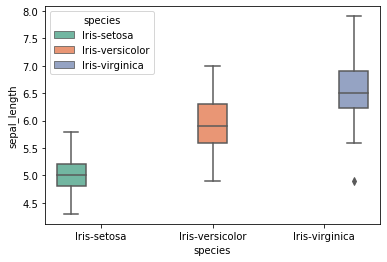

In [29]:
sns.boxplot(x="species", y="sepal_length", hue="species",data=data, palette="Set2")

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

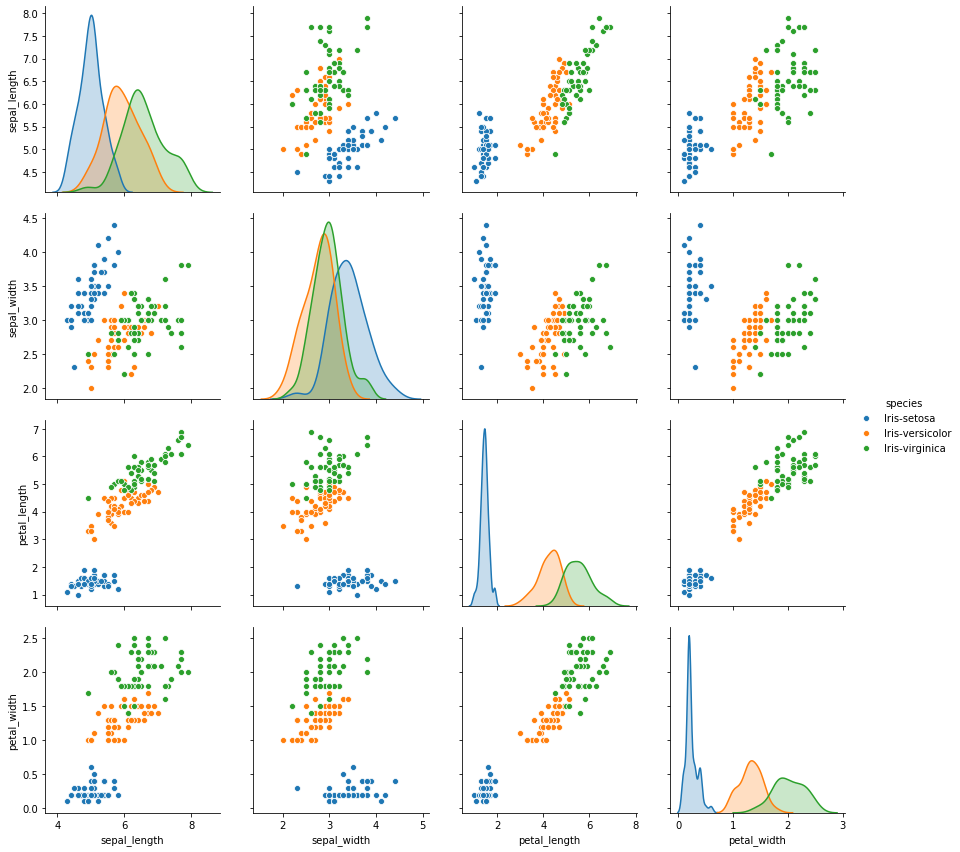

In [30]:
import seaborn as sns
sns.pairplot(data, hue='species', height=3)